<a href="https://colab.research.google.com/github/subhashini890/html/blob/main/image_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

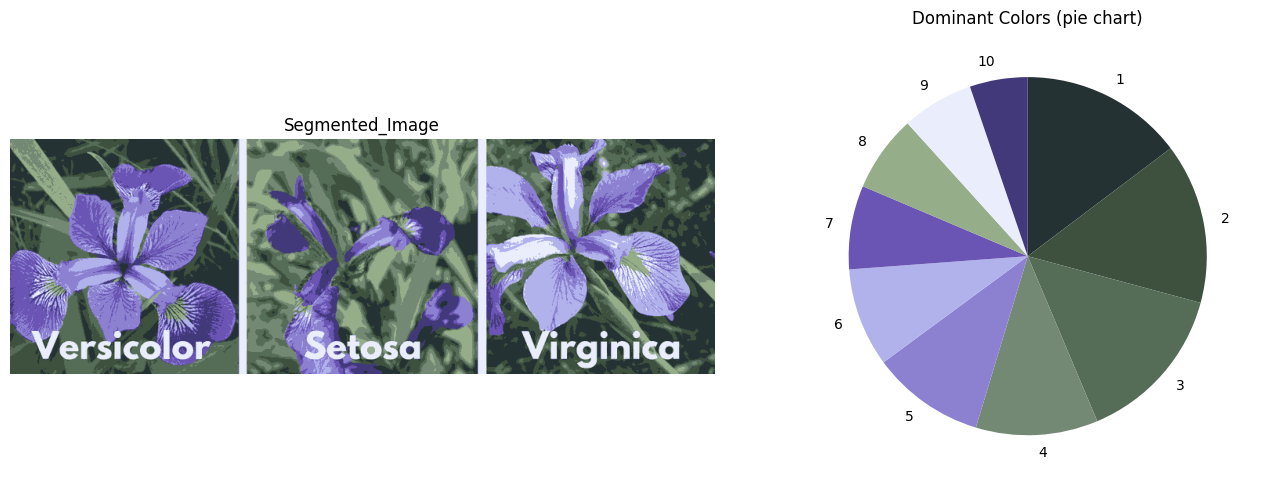

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("/content/iris.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixel = image_rgb.reshape((-1,3))
pixel = np.float32(pixel)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,100,0.85)
k=10
_, labels, centers = cv2.kmeans(pixel, k, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
centers = np.uint8(centers)
_, counts = np.unique(labels, return_counts=True)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(image_rgb.shape)
ax[0].imshow(segmented_image)
ax[0].set_title("Segmented_Image")
ax[0].axis('off')
sorted_indices = np.argsort(-counts)
sorted_colors = centers[sorted_indices]
sorted_counts = counts[sorted_indices]
fractions = sorted_counts / sum(sorted_counts)

ax[1].pie(fractions,
          colors=np.array(sorted_colors)/255,
          labels=[f'{i+1}' for i in range(k)],
          startangle=90,
          counterclock=False)
ax[1].set_title("Dominant Colors (pie chart)")

plt.tight_layout()
plt.show()















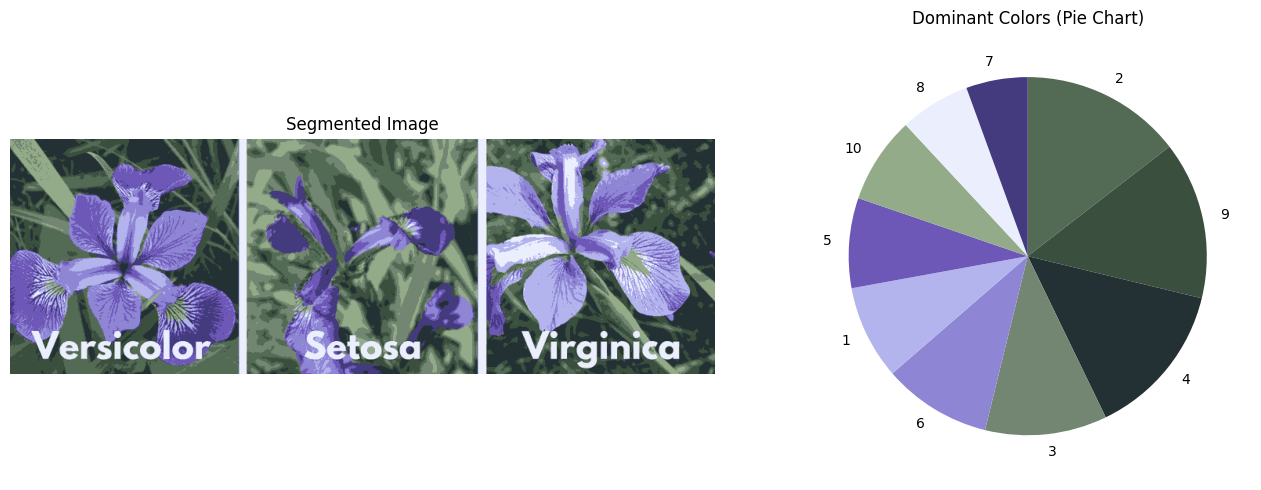

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert image
image = cv2.imread("/content/iris.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape and convert to float
pixel = image_rgb.reshape((-1, 3))
pixel = np.float32(pixel)

# KMeans clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 10
_, labels, centers = cv2.kmeans(pixel, k, None, criteria, 5, cv2.KMEANS_PP_CENTERS)

# Convert centers to uint8 for color use
centers = np.uint8(centers)

# Count frequency of each cluster
_, counts = np.unique(labels, return_counts=True)

# Recreate segmented image
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(image_rgb.shape)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].imshow(segmented_image)
ax[0].set_title("Segmented Image")
ax[0].axis('off')

# Sort by frequency
sorted_indices = np.argsort(-counts)
sorted_colors = centers[sorted_indices]
sorted_counts = counts[sorted_indices]
fractions = sorted_counts / sum(sorted_counts)

# Pie chart for dominant colors
ax[1].pie(fractions,
          colors=np.array(sorted_colors)/255,
          labels=[f'{i+1}' for i in sorted_indices],
          startangle=90,
          counterclock=False)
ax[1].set_title("Dominant Colors (Pie Chart)")

plt.tight_layout()
plt.show()
